In [1]:
from gensim import models
from gensim.models import Word2Vec
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (160, 160)
# matplotlib.rcParams.update({'font.size': 5})

In [2]:
# load data and make model
f = open('./Downloads/desc_text.txt', 'r')
sentences = [line.split() for line in f.readlines()]
f.close()

In [9]:
# {min_count} : Ignores all words with total frequency lower than this.
# {sg = 1} : skip gram model
model = Word2Vec(
    sentences=sentences,
    min_count=20,
    window=10,
    sg=1,
    workers=4)

print(type(model))

# get vocabulary
print(len(list(model.wv.vocab)))
print(list(model.wv.vocab))

<class 'gensim.models.word2vec.Word2Vec'>
816
['power', 'inten', 'caramel', 'dri', 'peat', 'eleg', 'cigar', 'smoke', 'seed', 'vanilla', 'bean', 'brand', 'new', 'peppercorn', 'ani', 'make', 'satisfi', 'nose', 'experi', 'silki', 'fruit', 'ripe', 'peach', 'stew', 'appl', 'orang', 'element', 'burnt', 'tobacco', 'finish', 'spice', 'pie', 'sweet', 'close', 'perfect', 'choic', 'impress', 'whiski', 'evolv', 'incr', 'complex', 'palat', 'thick', 'viscous', 'note', 'sticki', 'toff', 'earthi', 'oak', 'fig', 'cake', 'roast', 'nut', 'black', 'cherri', 'dark', 'chocol', 'cover', 'espresso', 'polish', 'leather', 'hint', 'linger', 'leafi', 'damp', 'kiln', 'flavor', 'continu', 'long', 'older', 'bowmor', 'mid', 'everi', 'bit', 'equal', 'remark', 'aroma', 'tropic', 'move', 'mango', 'pineappl', 'grapefruit', 'light', 'touch', 'islay', 'concentr', 'even', 'strength', 'last', 'glass', 'bottl', 'u', 'name', 'produc', 'one', 'two', 'batch', 'year', 'old', 'blend', 'never', 'go', 'rich', 'dusti', 'fresh', 'rais

In [4]:
vocab = list(model.wv.vocab)
X = model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
print(df)

                      x          y
power        -18.552824  18.405245
inten        -26.086384   6.158134
caramel      -29.764454  -7.212044
dri          -12.380323   0.844206
peat         -23.089136  12.713748
eleg          -3.352876   9.490199
cigar         -7.592563  -2.345932
smoke        -21.657133  15.341661
seed         -17.632353   7.021122
vanilla      -20.068932  -2.719428
bean         -30.266382 -18.522470
brand         35.976940   8.563157
new           33.445118  14.753704
peppercorn   -17.688511   6.683224
ani          -15.151320   8.809499
make          19.540188   0.404445
satisfi       -6.298386   4.019945
nose         -33.881195  -1.512364
experi        13.695113   8.238373
silki        -31.098755  -9.373691
fruit        -18.707256  -0.328053
ripe         -29.746096  -5.913189
peach        -28.127378  -6.845763
stew         -25.932041 -16.804111
appl         -21.292387 -10.727101
orang        -30.823339 -12.658387
element        5.499827 -14.870296
burnt        -28.646

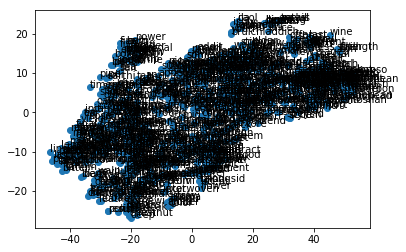

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)

# plt.savefig('filename.png', dpi = 400)

In [6]:
# CBOW
cbow_model = Word2Vec(sentences, min_count=20, workers=4)
# get vocabulary
print(len(list(cbow_model.wv.vocab)))
print(list(cbow_model.wv.vocab))

816
['power', 'inten', 'caramel', 'dri', 'peat', 'eleg', 'cigar', 'smoke', 'seed', 'vanilla', 'bean', 'brand', 'new', 'peppercorn', 'ani', 'make', 'satisfi', 'nose', 'experi', 'silki', 'fruit', 'ripe', 'peach', 'stew', 'appl', 'orang', 'element', 'burnt', 'tobacco', 'finish', 'spice', 'pie', 'sweet', 'close', 'perfect', 'choic', 'impress', 'whiski', 'evolv', 'incr', 'complex', 'palat', 'thick', 'viscous', 'note', 'sticki', 'toff', 'earthi', 'oak', 'fig', 'cake', 'roast', 'nut', 'black', 'cherri', 'dark', 'chocol', 'cover', 'espresso', 'polish', 'leather', 'hint', 'linger', 'leafi', 'damp', 'kiln', 'flavor', 'continu', 'long', 'older', 'bowmor', 'mid', 'everi', 'bit', 'equal', 'remark', 'aroma', 'tropic', 'move', 'mango', 'pineappl', 'grapefruit', 'light', 'touch', 'islay', 'concentr', 'even', 'strength', 'last', 'glass', 'bottl', 'u', 'name', 'produc', 'one', 'two', 'batch', 'year', 'old', 'blend', 'never', 'go', 'rich', 'dusti', 'fresh', 'raisin', 'surpri', 'back', 'wonder', 'first', 

In [7]:
cbow_vocab = list(cbow_model.wv.vocab)
cbow_X = model[cbow_vocab]

cbow_tsne = TSNE(n_components=2)
cbow_X_tsne = cbow_tsne.fit_transform(cbow_X)

cbow_df = pd.DataFrame(cbow_X_tsne, index=cbow_vocab, columns=['x', 'y'])
print(cbow_df)

                      x          y
power        -23.085648   2.191456
inten          4.691886 -16.431885
caramel       -8.988550 -18.435982
dri          -13.929784  -5.632400
peat         -28.550129  -3.100123
eleg          -7.632687   2.213990
cigar        -18.273697  -0.624829
smoke        -25.627823  -1.752828
seed         -20.657120  -5.115970
vanilla       -7.363776 -19.084337
bean         -20.907537 -23.992889
brand         15.143352  30.575624
new           18.102962  19.917877
peppercorn   -20.799589  -5.477836
ani          -18.761761  -3.490524
make          10.315948  14.135982
satisfi      -13.081401  -1.900545
nose           2.534721 -27.590433
experi         0.304957  14.814026
silki        -15.107391 -28.880892
fruit         -4.356558 -15.160485
ripe          -8.755732 -17.476105
peach          1.462165 -29.965187
stew         -15.990561 -24.641148
appl          -6.687708 -28.144663
orang        -15.482307 -27.175417
element       12.989148  -4.186230
burnt        -19.221

'\nfor word, pos in cbow_df.iterrows():\n    ax.annotate(word, pos)\n'

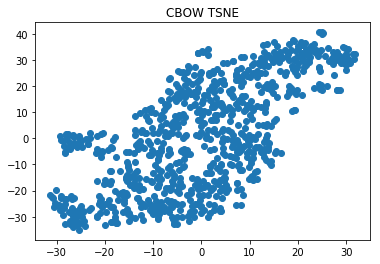

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(cbow_df['x'], cbow_df['y'])
plt.title('CBOW TSNE')

# print annotation
'''
for word, pos in cbow_df.iterrows():
    ax.annotate(word, pos)
'''